In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from read import read_data, read_passfail
import const

## Columns and types

In [25]:
data = read_data()
passfail = read_passfail()
passfail

,sleep_night_time,sleep_day_time,sleep_total_time,read_total_time,side_projects_time,phone_time,tv_time,exercise_total_time,exercise_shoulder_raises_volume,macros_kcal
0,True,True,True,True,True,True,True,True,False,False
1,False,True,False,True,True,False,True,True,False,True
2,True,True,True,True,True,True,True,True,False,False
3,False,False,True,True,True,False,True,True,False,False
4,False,True,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
177,True,False,True,False,True,True,True,True,False,False
178,False,False,True,True,True,True,True,True,True,True
179,True,True,True,True,True,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False


In [30]:
def show_passrate(ax: plt.Axes, values: pd.Series, passfail: pd.Series | None, index: pd.Series, time_format: bool):
    if passfail is None: colors = 'lightblue'
    else: colors = ['#1fdd55' if passed else '#f6894c' for passed in passfail]
    ax.bar(index, values, color=colors, width=0.75)
    set_style(ax, index)
    if time_format:
        if (max(values) // 60) > 1:
            ticks = range(1, int(max(values) // 60) + 1)
            if len(ticks) > 7: ticks = ticks[::2]
            ax.set_yticks([60 * i for i in ticks])
            ax.set_yticklabels([f'{i}h' for i in ticks])
        else:
            ticks = range(1, int(max(values) // 5) + 1)
            if len(ticks) > 7: ticks = ticks[::2]
            ax.set_yticks([5 * i for i in ticks])
            ax.set_yticklabels([f'{5*i}m' for i in ticks])

    if passfail is not None:
        y1 = values.max() * 0.55
        y2 = values.max() * 0.20
        x = index.max() + datetime.timedelta(days=7)
        pf = passfail.mean()
        avg = values.replace(0, np.nan).mean()
        if time_format:
            h = int(avg / 60)
            m = int(avg - h * 60)
            avg = ((f'{h}h' if h else '') + ' ' + (f'{m}m' if m else '')).strip()
        else: avg = f'{avg:.1f}'            
        ax.text(x, y1, s=f'average\n{avg}', ha='center', va='center', fontsize=12)
        ax.text(x, y2, s=f'passrate\n {pf:.1%}', ha='center', va='center', fontsize=12)

In [29]:
def set_style(ax: plt.Axes, index: pd.Series):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(index.min(), index.max())
    xticks = index[::7]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.map(lambda x: x.strftime('%d.%m.%Y')), rotation=45, ha='right')

In [5]:
def create_graph(values_df: pd.DataFrame, passfail_df: pd.DataFrame, cols: list[str], labels: list[str], time_format: bool):
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 2 * len(cols) + 1), sharex=True)
    if len(cols) == 1: axes = [axes]
    for ax, col, label in zip(axes, cols, labels):
        show_passrate(ax, values_df[col], passfail_df[col] if col in passfail_df else None, values_df['date'], time_format=time_format)
        if len(axes) > 1: ax.set_title(label)
        else: print(label)
    fig.tight_layout()
    plt.show()

### Sleep

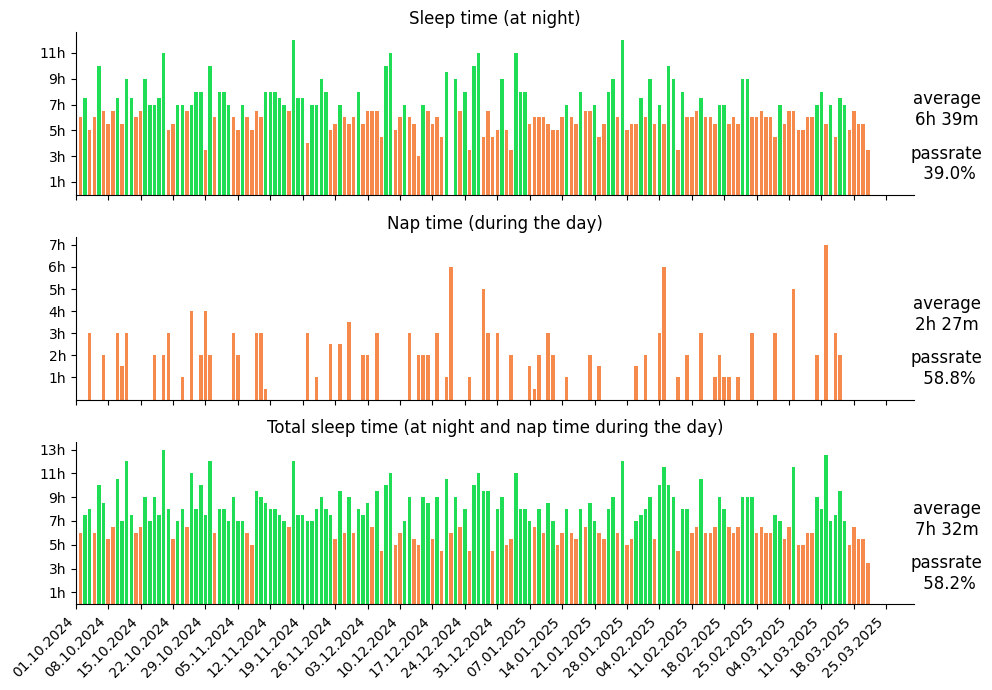

In [25]:
create_graph(
    data,
    passfail,
    const.COLS_SLEEPING,
    ['Sleep time (at night)', 'Nap time (during the day)', 'Total sleep time (at night and nap time during the day)'],
    time_format=True)

### Read

Reading time


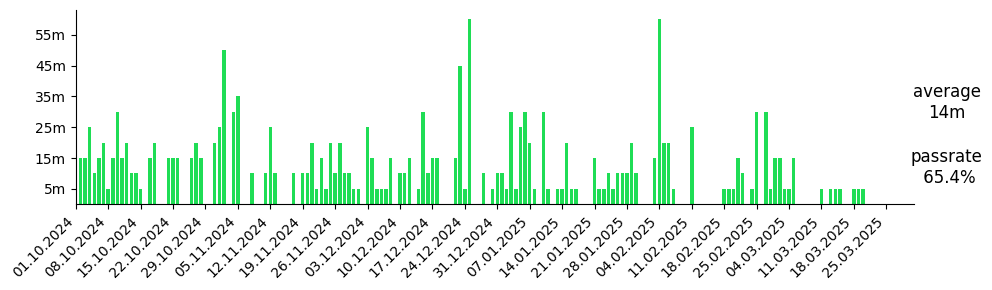

In [26]:
create_graph(data, passfail, const.COLS_READING[-1:], ['Reading time'], time_format=True)

### Work

Working on side projects


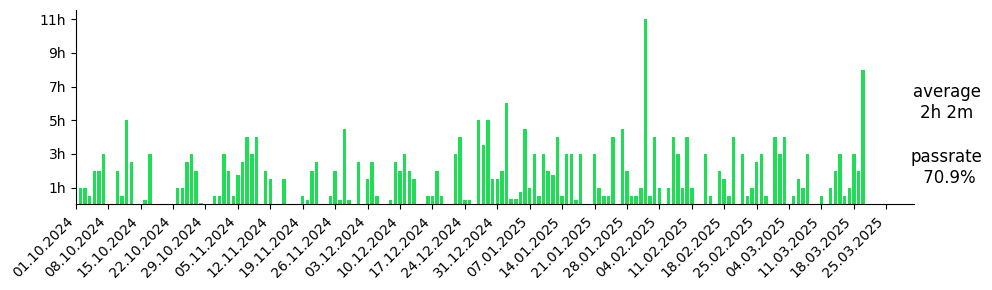

In [27]:
create_graph(data, passfail, const.COLS_WORKING[-1:], ['Working on side projects'], time_format=True)

### Leisure

Phone usage


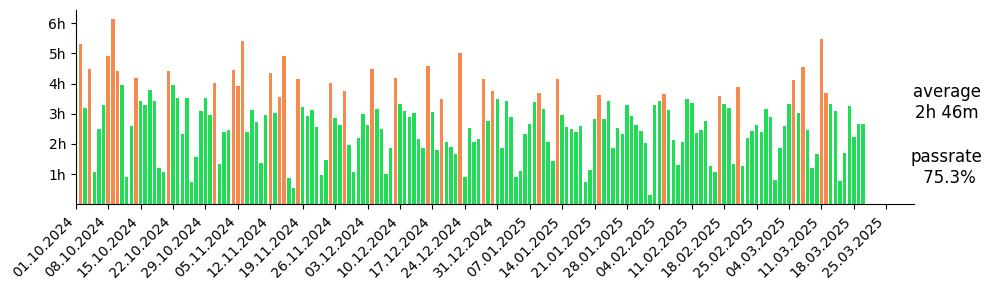

Watching TV


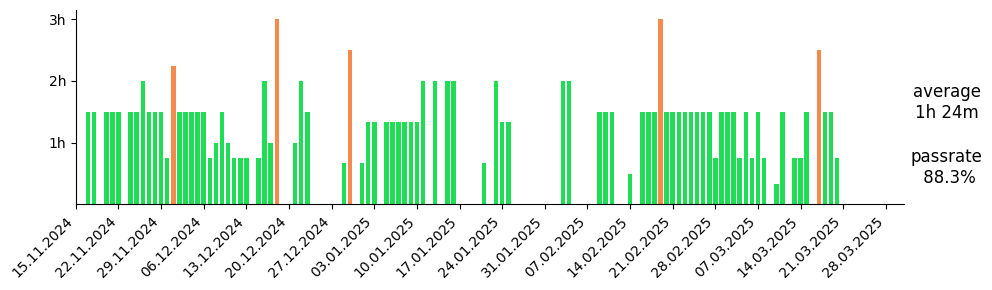

In [28]:
phone, tv = const.COLS_LEISURE
create_graph(data, passfail, [phone], ['Phone usage'], time_format=True)
create_graph(data[45:], passfail[45:], [tv], ['Watching TV'], time_format=True)

### Exercise

Exercise time


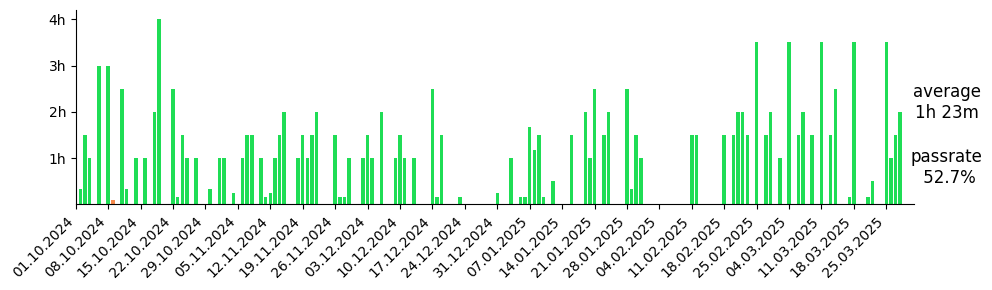

In [35]:
create_graph(data, passfail, [const.COLS_EXERCISE[-1]], ['Exercise time'], time_format=True)

Shoulder raises


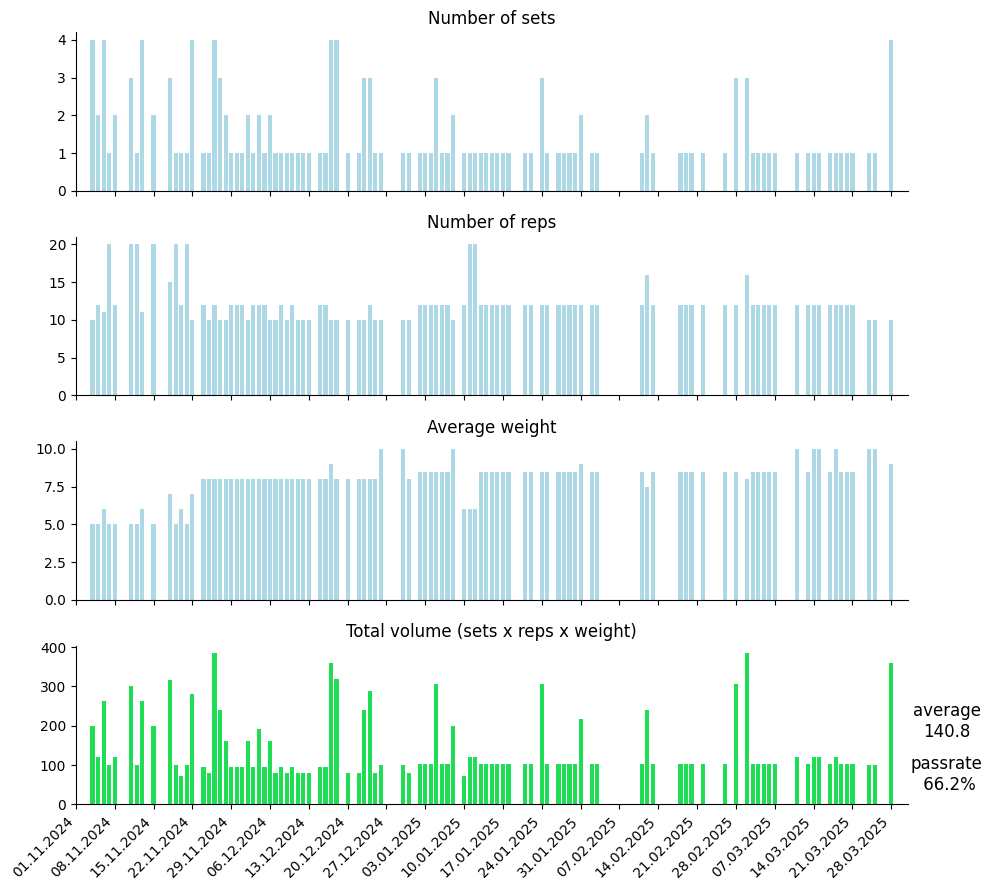

In [36]:
print('Shoulder raises')
create_graph(
    data[31:],
    passfail[31:],
    const.COLS_SHOULDER_RAISES,
    ['Number of sets', 'Number of reps', 'Average weight', 'Total volume (sets x reps x weight)'],
    time_format=False)

### Calories

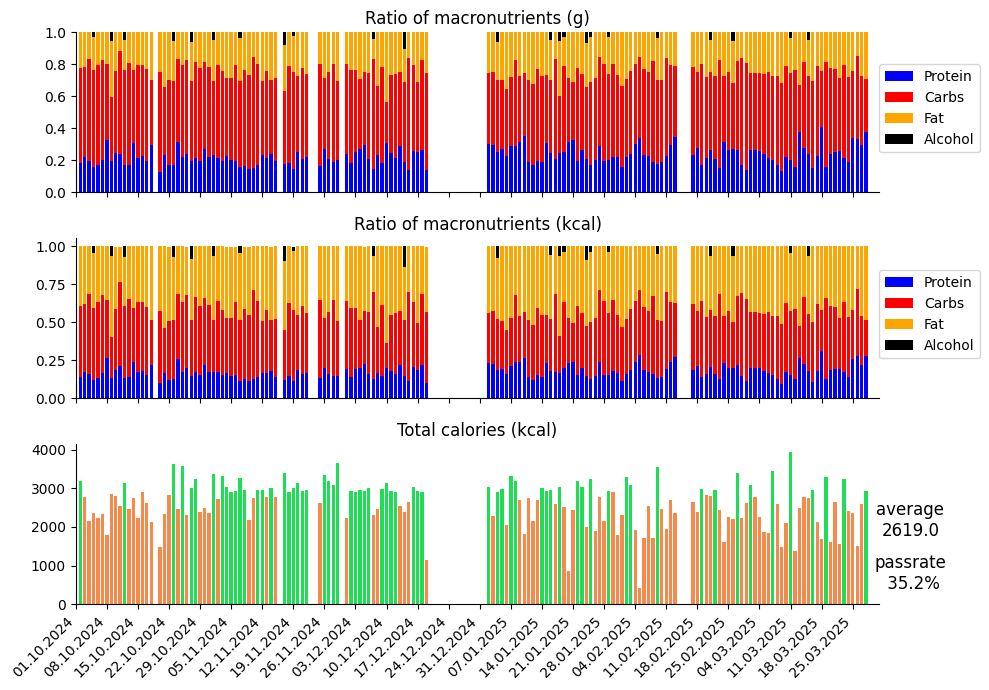

In [31]:
p, c, f, a, kcal = const.COLS_EATING
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

data['total_g'] = data[p] + data[c] + data[f] + data[a]
axes[0].bar(data['date'], data[p] / data['total_g'], color='blue', width=0.75, label='Protein')
axes[0].bar(data['date'], data[c] / data['total_g'], color='red', width=0.75, label='Carbs', bottom=data[p] / data['total_g'])
axes[0].bar(data['date'], data[f] / data['total_g'], color='orange', width=0.75, label='Fat', bottom=(data[p] + data[c]) / data['total_g'])
axes[0].bar(data['date'], data[a] / data['total_g'], color='black', width=0.75, label='Alcohol', bottom=(data[p] + data[c] + data[f]) / data['total_g'])
axes[0].legend(ncol=1, loc=(1.0, 0.25))
data.drop('total_g', axis=1, inplace=True)

data['p_kcal'] = data[p] * 4 / data[kcal]
data['c_kcal'] = data[c] * 4 / data[kcal]
data['f_kcal'] = data[f] * 9 / data[kcal]
data['a_kcal'] = data[a] * 7 / data[kcal]
axes[1].bar(data['date'], data['p_kcal'], color='blue', width=0.75, label='Protein')
axes[1].bar(data['date'], data['c_kcal'], color='red', width=0.75, label='Carbs', bottom=data['p_kcal'])
axes[1].bar(data['date'], data['f_kcal'], color='orange', width=0.75, label='Fat', bottom=data['p_kcal'] + data['c_kcal'])
axes[1].bar(data['date'], data['a_kcal'], color='black', width=0.75, label='Alcohol', bottom=data['p_kcal'] + data['c_kcal'] + data['f_kcal'])
axes[1].legend(ncol=1, loc=(1.0, 0.25))
data.drop(['p_kcal', 'c_kcal', 'f_kcal', 'a_kcal'], axis=1, inplace=True)

show_passrate(axes[2], data[kcal], passfail[kcal], data['date'], time_format=False)

set_style(axes[0], data['date'])
set_style(axes[1], data['date'])
set_style(axes[2], data['date'])

axes[0].set_title('Ratio of macronutrients (g)')
axes[1].set_title('Ratio of macronutrients (kcal)')
axes[2].set_title('Total calories (kcal)')
fig.tight_layout()
plt.show()

### Energy

Energy level (subjective)


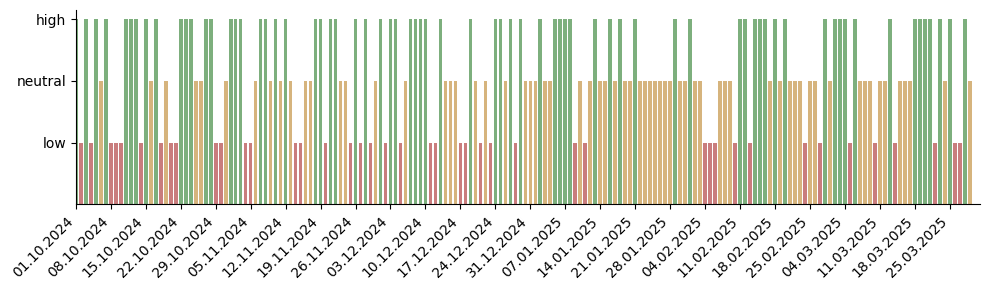

In [34]:
series = data[const.COLS_OTHER[-1]]
colormap = { 'low': '#C97D7D', 'neutral': '#D6B47D', 'high': '#7DAF7D', np.nan: 'grey' }
valuemap = { 'low': 1, 'neutral': 2, 'high': 3, np.nan: 0 }
colors = [colormap[v] for v in series]
values = [valuemap[v] for v in series]

print('Energy level (subjective)')
fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
ax.bar(data['date'], values, color=colors, width=0.75)
set_style(ax, data['date'])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['low', 'neutral', 'high'])
fig.tight_layout()
plt.show()

In [ ]:
wykres weekly - alcohol, gym, medium, linkedin - heatmap
